## Étudiant : CHERIEF Yacine-Samy

## M1 MIAGE * Université Paris Dauphine - PSL

## Année : 2024/2025

## Projet de Machine Learing et applications

--------------------------------------------------------------------------------







## 1 - Description du problème :    



> **Contexte** : Dans ce projet, nous cherchons à prédire si un client va souscrire (oui/non) à un dépôt à terme auprès d'une banque, sur la base de différentes informations socio-économiques et relatives à la campagne de télémarketing.

> **Objectif** : Il s'agit d'analyser les données qui nous ont été fournies. l'objectif est de Développer un modèle de classification capable de prédire avec le plus de fiabilité possible la souscription.

 Nous allons donc expérimenter plusieurs algorithmes de classification :
1.   Régression logistique
2.   Arbre de décision
3.   Naives Bayes
4.   KNN

Le but est de comparer leurs performances via différentes métriques ( précision, recall, F1, AUC, etc.), puis de choisir le ou les modèles les plus adaptés.

-------------------------------------------------------------------------------

- expliquer si votre projet peut se traiter comme une classification ou une régression ou les deux à la fois ?
  - Le cœur du projet consiste à prédire si un client va souscrire ou non à un dépôt à terme (“yes” ou “no”). Cette question se formule naturellement comme un problème de classification binaire : la variable cible prend deux valeurs (oui / non). Dans ce cas, on entraînera des modèles de classification (régression logistique, arbres de décision, KNN, etc.) qui, à partir des données descriptives (features), tenteront de prédire l'étiquette “yes” ou “no”.

## 2 - Description des données :

L'ensemble de données nous donne des informations sur une campagne de marketing d'une institution financière.Ces campagnes de marketing étaient basées sur des appels téléphoniques.

A partir de la documentation du jeu de données, nous pouvons voir ci-dessous la liste des colonnes que nous avons dans nos données.


Dans le dataset Bank, la variable cible est y. Elle prend les valeurs “yes” ou “no” et indique si le client a souscrit à un dépôt à terme.

Features principales :    

Informations clients :
* age : âge du client (valeur numérique)
*	job : type d'emploi (ex. “management”, “technician”, etc.)
*	marital : statut marital (ex. “married”, “single”, “divorced”)
*	education : niveau d'éducation
*	default : le client a-t-il des dettes en défaut ? (yes/no)
*	balance : solde moyen du compte bancaire
*	housing : prêt immobilier (yes/no)
*	loan : prêt personnel (yes/no)
----------  
Variables qui ont un lien avec le dernier contact de la campagne marketing actuelle :
*	contact : type de contact (téléphone fixe, cellulaire…)
*	month : mois du dernier contact (jan, feb, mar, …)
*	day : jour de la semaine
*	duration : durée du dernier contact en secondes
----------
*	campaign : nombre de contacts effectués pendant la campagne actuelle
*	pdays : nombre de jours écoulés depuis la dernière campagne
*	previous : nombre de contacts lors des campagnes antérieures
*	poutcome : résultat de la précédente campagne (success/failure/other).  
----------

- Pour l'instant toutes les variables seront conservées.

Dans les premières étapes du développement d'un modèle de classification pour prédire si un client va ou non contracter un dépôt à terme, j'ai choisi de conserver toutes les variables parce que je ne connais pas encore l'impact de chacune d'entre elles sur le modèle.

> Piste de réflexion : Selon la documentation du jeu de données, nous devons peut-etre supprimer la colonne 'duration' car, dans la réalité, la durée n'est connue qu'une fois la colonne 'y' connue.

## Sommaire     

1.  **Importation des données** : Les données seront importées à partir d'un fichier CSV contenant des informations sur les clients et leur décision de souscrire ou non.
2. **Analyse exploratoire des données** : Une analyse univariée sera effectuée pour comprendre la distribution des données et les relations entre les variables.
3.  **Prétraitement des données** : Les données seront nettoyées et prétraitées pour gérer les valeurs manquantes et aberrantes, ainsi que pour encoder les variables catégorielles.
4. **Construction de modèles** : Différents modèles de prédiction seront construits et évalués, tels que la régression logistique, les arbres de décision,KNN...etc.
5. **Optimisation des hyperparamètres** : Les hyperparamètres des modèles seront optimisés pour améliorer leurs performances.
6. **Conclusion** : Identifier le modèle le plus performant pour prédire la souscription des clients.


## Importation des librairies

In [70]:
# importation des modules nécessaires
import numpy as np
import pandas as pd
import seaborn as sns # data visualisation
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve



from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import train_test_split

from sklearn import metrics
import matplotlib.pyplot as plt

## 3 - Analyses et Prétraiment des données

> Avant de commencer à créer notre premier modèle, nous devons d'abord le prétraiter. Cette étape permet de s'assurer que notre modèle recevra de bonnes données pour apprendre, comme on dit « un modèle n'est **bon** que si ses données le sont ». Le prétraitement des données sera divisé en plusieurs étapes.

Chargement des données depuis le fichier CSV

In [71]:
df = pd.read_csv("bank-full.csv",sep=";") # importer les données depuis le fichier CSV.

In [54]:
df.head() # afficher les 5 premieres ligne.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**Observation** :  Grâce à ce tableau, nous pouvons voir les 5 premières lignes du dataset, le plus intéressant est que nous pouvons voir quels sont les attributs à notre disposition et quelle est la variable de sortie à prédire

In [45]:
df.shape # Nombre de ligne, colonne du DataSet

(45211, 17)

> **Observation** : Grâce à la fonction shape(), nous pouvons avoir une première idée de la taille de notre dataset. Nous pouvons voir ici que les données financier de 45211 individus ont été collectées et que le nombre de données financier collectées sur ces individus est de 17.

In [46]:
print("information géneral : \n")
df.info()

information géneral : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


- **Object** : Signifie que les variable sont de type qualitatives.les variables qualitatives sont :  job,marital,education,default,housing,loan,contact,month,poutcome,y.   
- **int64** : signifie que les variables sont de type quantitatives (numérique).les variables quanti sont : age,balance,day,duration,campaign,pdays,previous

In [ ]:
df.describe() # description des colonnes numérique

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
# Visualisation des valeurs des attributs nominals
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


Job,education,contact et poutcome ont des valuers "unkonws" (inconnu)

#### **Valeurs Manquante**
Nous allons utiliser la fonction `is_null()` de Pandas pour vérifier s'il y a des données manquantes et ensuite utiliser la fonction `sum()` pour voir le total des valeurs manquantes dans chaque colonne.

In [55]:
df.isnull().sum() # vérification des valeurs manquantes pour chaques colonnes

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


> il n'y a pas de données manquantes et donc on peut utilisé ces données,  
N.B : dans le cas où on avait des données manquantes il aurait fallu résoudre cela, en supprimant la colonne par exemple ou Imputer les valeurs par la moyenne,Median..etc.

##### Doublons ?

In [47]:
dups = df.duplicated()
print("y a t'il des données dupliqué ? ",dups.any())

y a t'il des données dupliqué ?  False


> pas de doublons dans nos données

#### **Analyse des données**

> L'objectif de cette partie est de mener une analyse exploratoire de donées afin identifier des éventuels problemes dans nos donées (valeurs extremes, incohérences, etc...) et les traiter par la suite. Cette etape est indispensable pour la bonne construction d'un modèle de prédiction.

##### Analyse Univarié

###### I - Analyse des attributs **numérique**

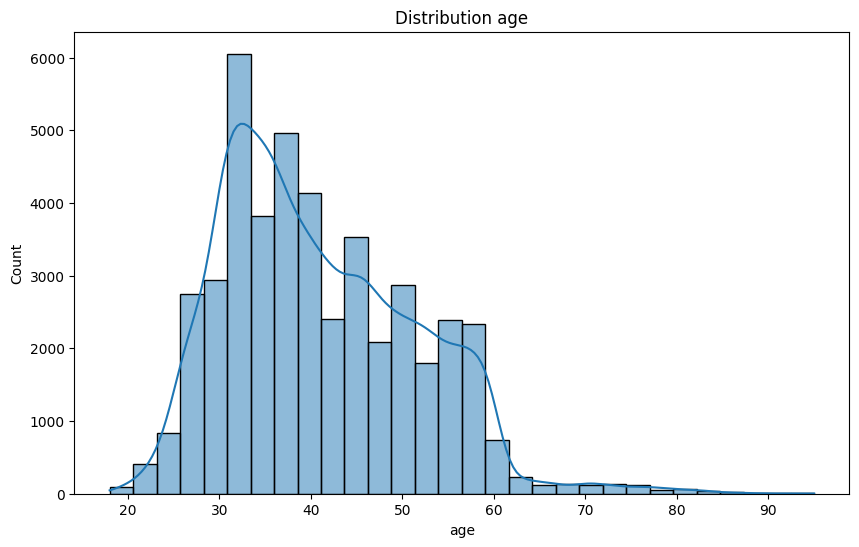

In [ ]:
# Age distribution
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution age')
plt.show()

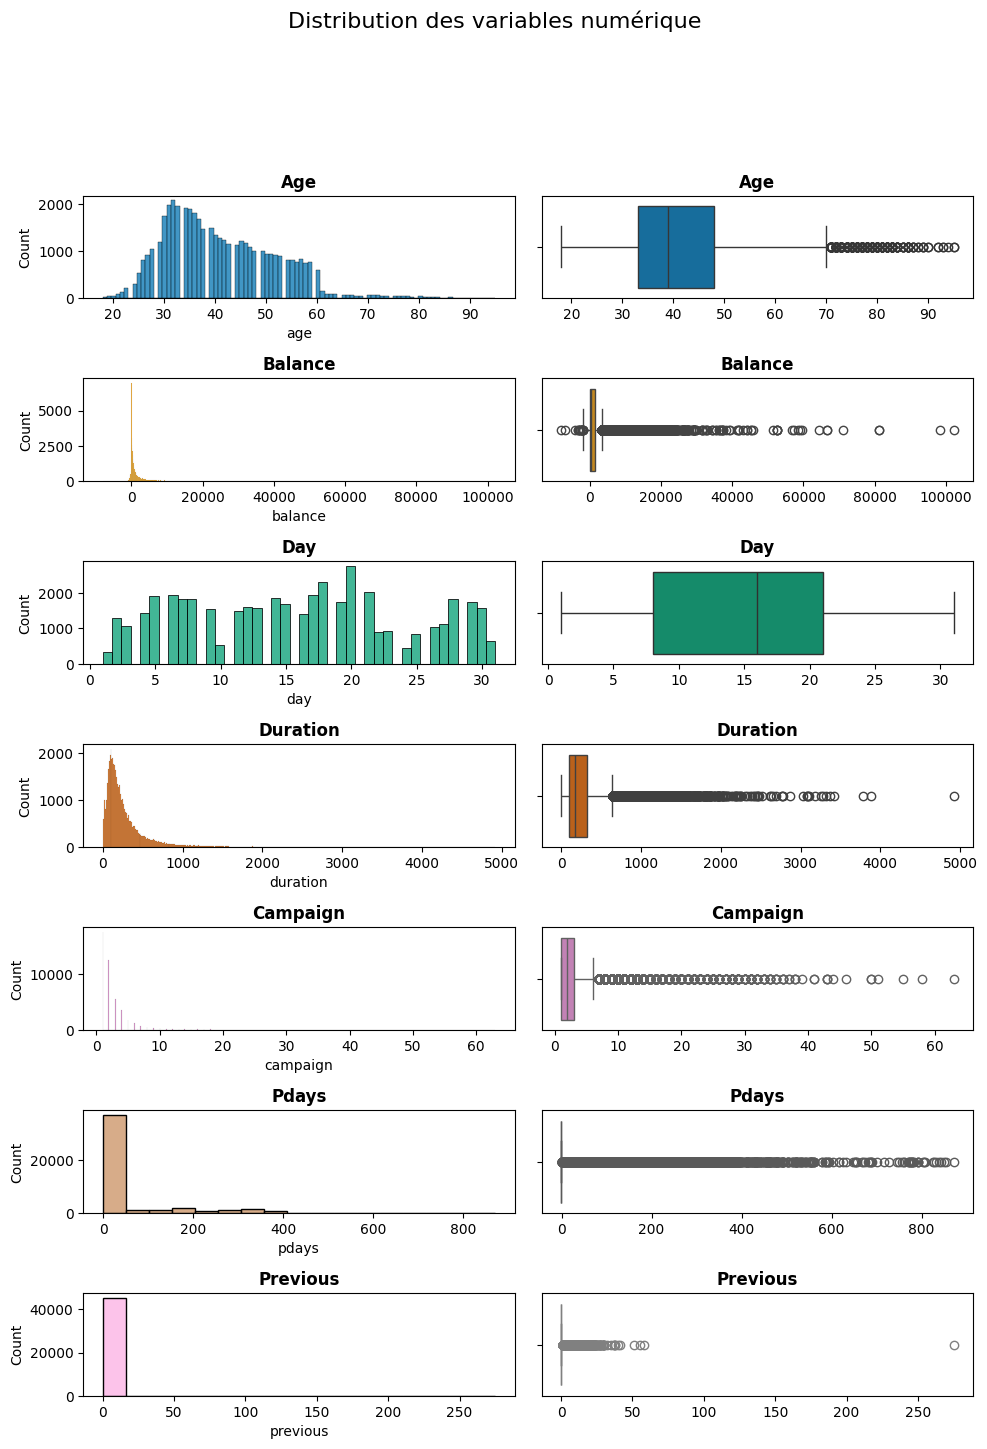

In [ ]:
def plot_numerical_variables(df_numerical, hue=None):
    # 1. On récupère la liste de toutes les colonnes numériques
    numerical_columns = df_numerical.columns.tolist()

    # 2. On calcule le nombre de variables et on détermine
    #    combien de rangées de sous-graphiques il nous faut.
    num_vars = len(numerical_columns)
    num_rows = (num_vars + 1) // 2  # Division par 2 car on aura 2 colonnes

    # 3. On crée la grille de sous-graphes (subplots).
    #    On met 2 graphiques par rangée (histogramme et boxplot).
    fig, axes = plt.subplots(num_rows * 2, 2, figsize=(10, num_rows * 4))
    plt.suptitle('Distribution des variables numérique', fontsize=16, y=1.02)

    # 4. On "aplatit" le tableau d'axes pour itérer plus simplement dessus.
    axes = axes.flatten()

    # 5. On définit une palette de couleurs fixe.
    #    "colorblind" est un jeu de couleurs compatible daltonisme.
    palette = sns.color_palette("colorblind", num_vars)

    # 6. Pour chaque variable numérique, on trace un histogramme et un boxplot.
    for i, col in enumerate(numerical_columns):
        # Sélection de la couleur correspondant à la i-ème variable,
        # en s'assurant de rester dans les limites de la palette.
        color = palette[i % len(palette)]

        # a) Histogramme :-----------------------------------------------------
        #    - On trace un histplot (histogramme)
        #    - On applique un hue si la colonne mentionnée existe dans df_numerical
        sns.histplot(
            ax=axes[i * 2],
            data=df_numerical,
            x=col,
            hue=hue if (hue in df_numerical.columns) else None,
            color=color
        )
        axes[i * 2].set_title(col.capitalize(), fontweight='bold')

        # b) Boxplot :-----------------------------------------------------------
        #    - On trace un boxplot sans hue
        #      (pour observer la distribution générale de la variable).
        sns.boxplot(
            ax=axes[i * 2 + 1],
            data=df_numerical,
            x=col,
            color=color
        )
        axes[i * 2 + 1].set_title(col.capitalize(), fontweight='bold')
        axes[i * 2 + 1].set(xlabel=None)  # On enlève le label d’axe pour plus de clarté

    # 7. Si le nombre de variables est impair, il peut rester des axes vides :---------------------------------------------------------------------
    #    on les supprime de la figure pour éviter qu’ils n’apparaissent en blanc.
    for j in range(i * 2 + 2, len(axes)):
        fig.delaxes(axes[j])

    # 8. On ajuste l’agencement des graphiques pour éviter les chevauchements.-------------------------------------------------------------------
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# On récupère les colonnes numériques sous forme d'un DataFrame ---------------------------------------------------------------------------------
# (ici, on sélectionne les colonnes de type int64 par exemple).
df_numerical = df.select_dtypes('int64')

# On lance la fonction pour tracer histogrammes et boxplots,
# en colorant l’histogramme selon la variable 'y' (si présente).
plot_numerical_variables(df_numerical, hue='y')

***Observation*** :    

1.  **Age** : La majorité des clients ont entre 25 et 60 ans, ce qui représente la tranche d'âge la plus active. On observe quelques valeurs extrêmes au-dessus de 70 ans, mais elles restent rares. Le boxplot montre une dispersion modérée et peu de valeurs vraiment atypiques.  
2.  **Balance** : La distribution est fortement asymétrique : la grande majorité des soldes est proche de 0 (voire légèrement négative), tandis que certaines valeurs sont très élevées (plus de 40 000, voire 80 000 ou 100 000).Le boxplot confirme la présence d'un grand nombre de “valeurs extrêmes” positives, montrant qu'un petit groupe de clients dispose d'un solde bancaire très important.   

3.  **Day** : Les contacts sont répartis sur tout le mois (de 1 à 31), avec une fréquence légèrement plus élevée vers la fin du mois (ex. autour du 20e jour).
Le boxplot montre une médiane autour de 15-20, avec quelques jours (surtout au-delà de 25) considérés comme valeurs extrêmes.Cela indique que les appels peuvent survenir à n'importe quel moment du mois, sans concentration trop marquée sur un seul créneau.

4.  **Duration** : La plupart des appels durent moins de 500 secondes, ce qui correspond à une durée de quelques minutes ou moins.
La distribution est très biaisée vers la droite : on observe de rares appels très longs (jusqu'à plus de 4000 voire 5000 secondes).
Le boxplot corrobore cette forte dispersion, avec beaucoup de valeurs considérées comme “outliers” lorsqu'elles dépassent les 1000 secondes environ.    

5.  **Campaign** : Le nombre de contacts est majoritairement faible : la plupart des clients n’ont été appelés qu'une ou deux fois.On trouve cependant des valeurs allant jusqu'à 30, 40 ou même plus de 50, bien que ces cas restent très rares.Le boxplot révèle clairement un effet de long tail, où quelques clients sont contactés de nombreuses fois.

6.  **Pdays** : La distribution montre un pic massif à 0.Les autres valeurs (100, 200, 300, etc.) sont beaucoup plus rares.Le boxplot affiche une large plage de valeurs jusqu'à plus de 800 jours, démontrant que certains clients n’ont pas été recontactés depuis plus de deux ans.

7. **Previous** : Une majorité écrasante de clients n'ont aucun contact antérieur (previous = 0).Quelques clients ont eu plusieurs interactions sur d'anciennes campagnes (jusqu'à plus de 50 ou 100, voire plus de 200 dans de très rares cas).Ici encore, on voit une distribution extrêmement dissymétrique, avec un grand nombre de zéros et quelques outliers.

In [ ]:
df[['balance','pdays', 'campaign', 'previous']].describe()

,balance,pdays,campaign,previous
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,1362.272058,40.197828,2.763841,0.580323
std,3044.765829,100.128746,3.098021,2.303441
min,-8019.000000,-1.000000,1.000000,0.000000
25%,72.000000,-1.000000,1.000000,0.000000
50%,448.000000,-1.000000,2.000000,0.000000
75%,1428.000000,-1.000000,3.000000,0.000000
max,102127.000000,871.000000,63.000000,275.000000


Traitement des valeurs abérante :    


In [72]:
df = df[df['campaign'] < 55]

In [73]:
df = df[df['duration'] < 4800]

In [74]:
df = df[df['previous'] < 41]

In [75]:
df = df[df['balance'] < 80000]

###### Corrélation entre attributs

<Axes: >

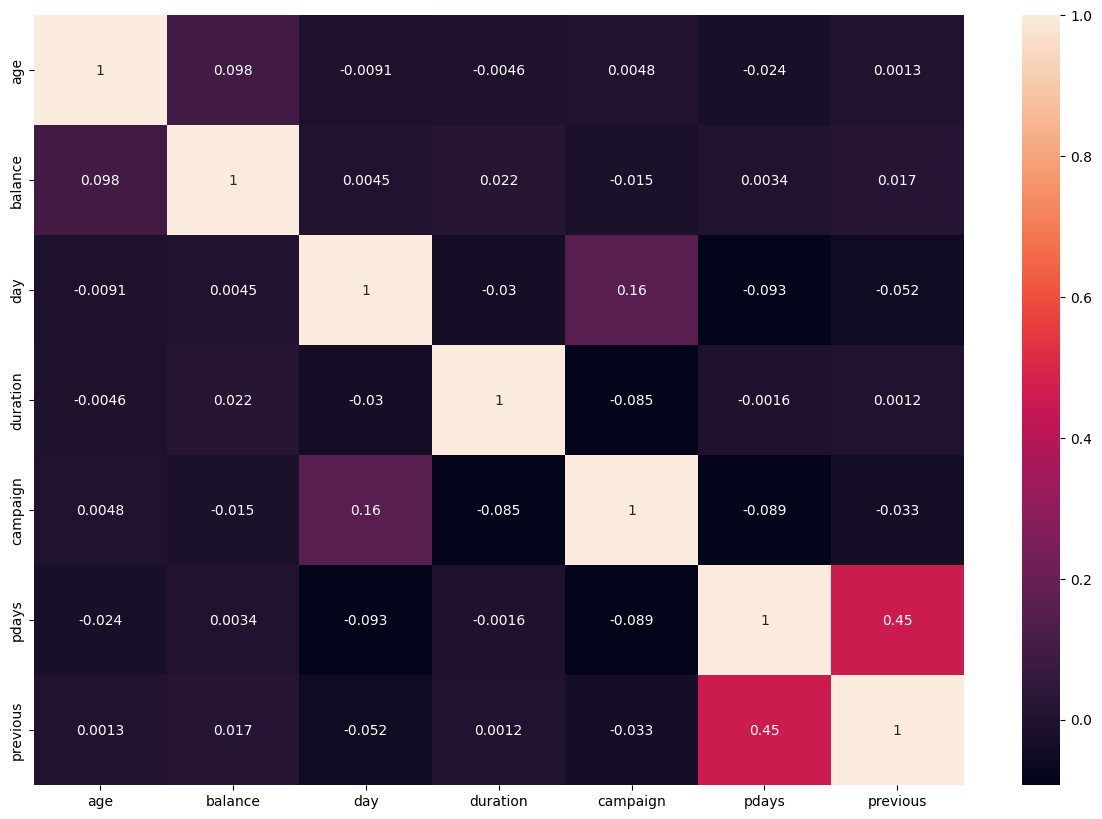

In [ ]:
plt.figure(figsize=(15, 10))
correlation = numerical_df.corr()
sns.heatmap(correlation,annot=True)

**Observation**

> Il semble qu'aucune attriburt n'est fortement corrélée avec un autre attribut.

###### Analyse des attributs déscriptive

In [48]:
# Répartition de "Yes"/"No" dans la target
df['y'].value_counts(normalize = True)

,proportion
y,
no,0.883015
yes,0.116985


<Axes: xlabel='y', ylabel='count'>

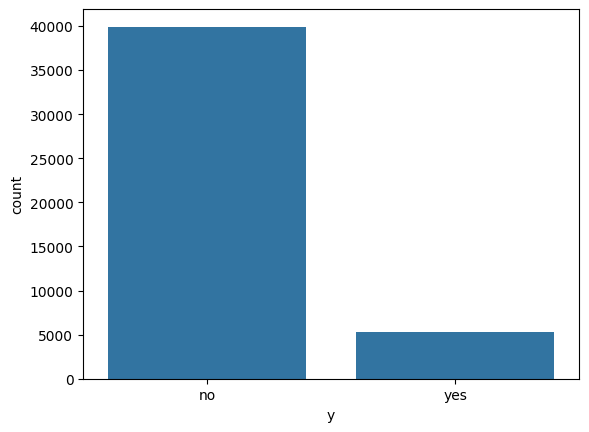

In [49]:
sns.countplot(x='y', data=df)

Il s'agit d'un ensemble de données très déséquilibré ; on peut supposer que l'accuracy ne va pas bien fonctionner avec des données déséquilibrées, c'est pourquoi nous pouvons préviligié l'**AUC** comme métrique.   
N.B : nous allons quand meme calculez l'accuracy.

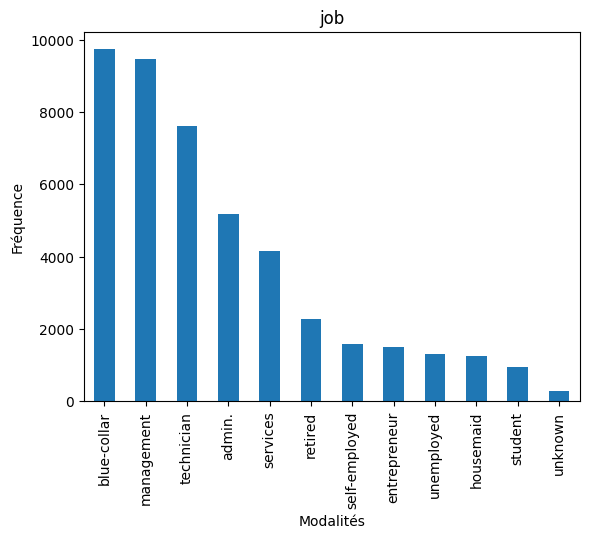

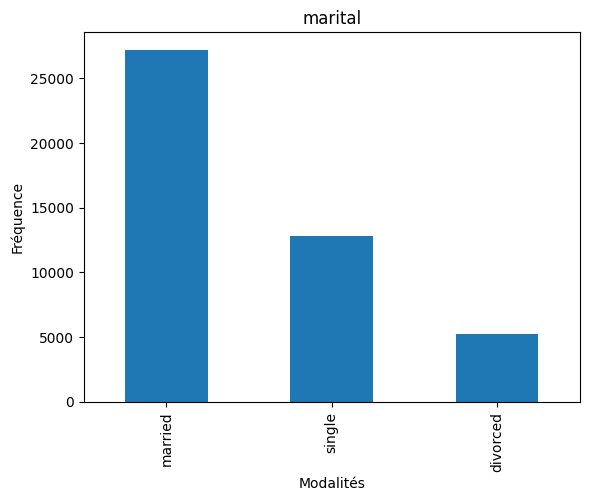

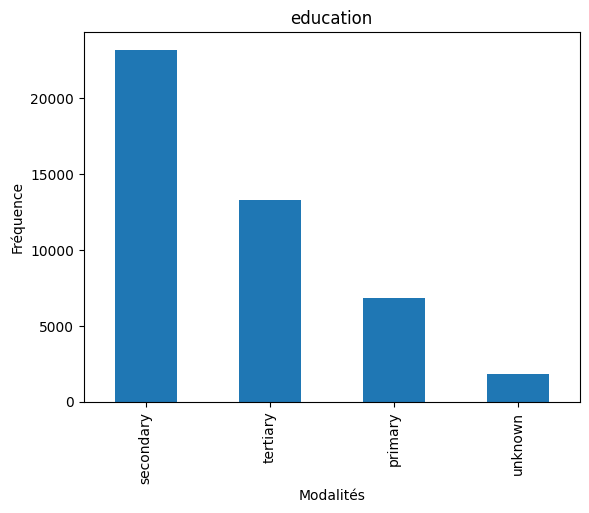

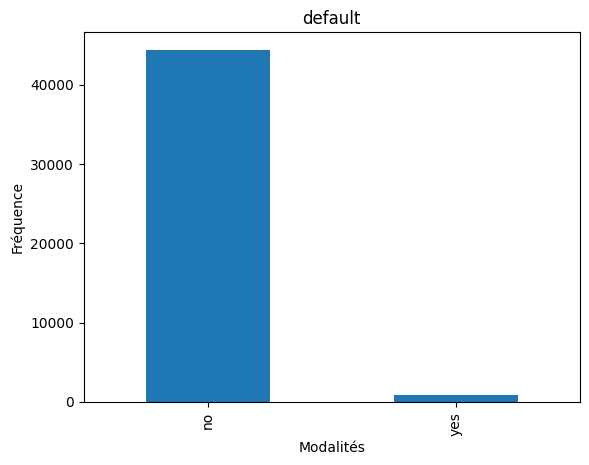

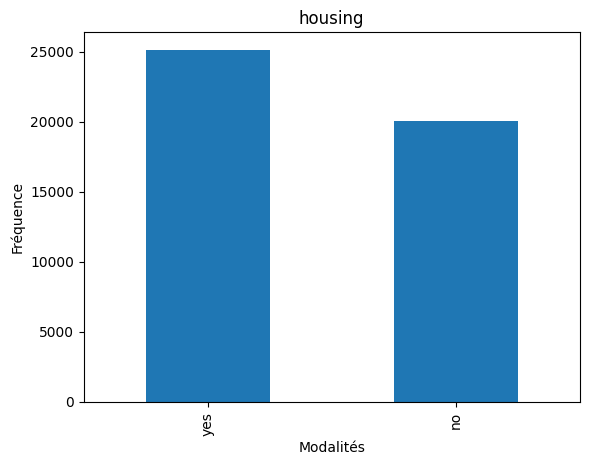

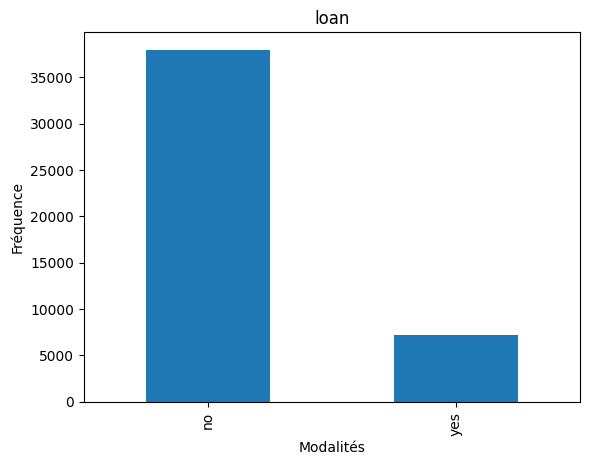

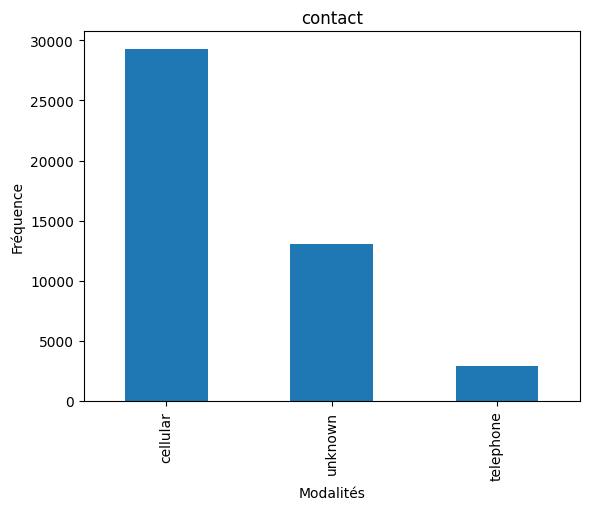

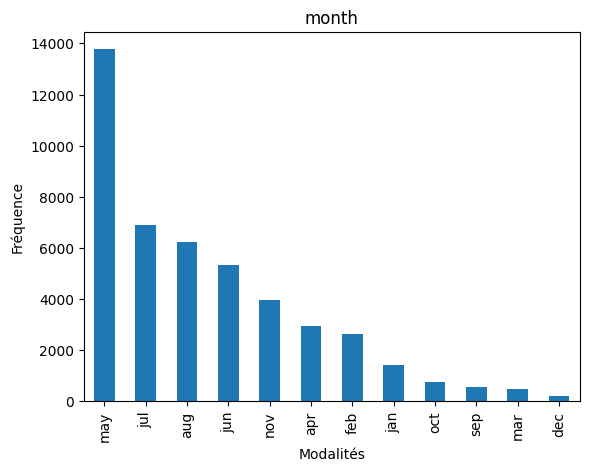

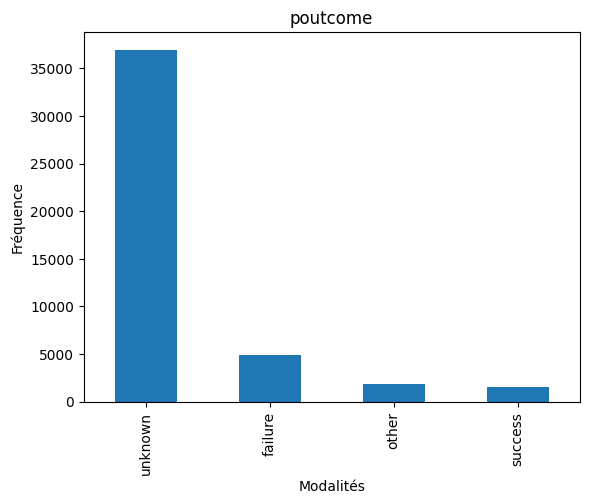

In [50]:
cat_vars = [col for col in df.columns if df[col].dtype == 'object' and col != 'y']

# Générer un bar plot pour chaque variable catégorielle
for var in cat_vars:
    df[var].value_counts().plot(kind='bar')
    plt.title(var)
    plt.xlabel('Modalités')
    plt.ylabel('Fréquence')
    plt.show()

***Observation*** :    



1.  **Job** : Les professions blue-collar (ouvrier) et management (cadre/manager) sont les plus fréquentes.Les catégories telles que student, housemaid ou unknown sont nettement moins représentées.On remarque donc que la clientèle de la banque se compose largement de personnes employées dans des métiers manuels ou d'encadrement, tandis que les catégories moins courantes (étudiants, travailleurs domestiques, etc.) sont plus marginales.  

2.  **Marital** : Une très forte majorité des clients est married (mariés).	Les single (célibataires) arrivent en deuxième position, suivis des divorced (divorcés) qui restent peu nombreux.Cela confirme que la plupart des clients sont mariés, ce qui peut avoir des implications sur les produits bancaires proposés (emprunt immobilier en couple, prêts familiaux, etc.).

3.  **Education** :	La catégorie secondary (études secondaires) est la plus fréquente, suivie de tertiary (études supérieures).primary (études primaires) et unknown (inconnu) représentent des parts plus faibles.Cela indique un niveau d'instruction globalement intermédiaire ou élevé, sachant qu’une part notable des clients a fait des études supérieures.

4.  **Default** : On constate que presque tous les clients sont dans la modalité no (pas de crédit en défaut), et très peu sont marqués yes.
Cela suggère que la banque a relativement peu de clients en situation de défaut de paiement sur leur crédit.Cette variable est donc très déséquilibrée et pourrait s'avérer peu discriminante pour la prédiction.

5.  **Housing** : 	La plupart des clients (plus de la moitié) ont un crédit immobilier (yes).
Ceux qui n'ont pas de crédit immobilier (no) sont tout de même nombreux, mais en moindre proportion.Le fait qu'un client ait un crédit immobilier pourrait influencer sa capacité à souscrire un autre produit bancaire (comme un dépôt à terme).

6.  **loan** : •	Une majorité importante n'a pas de crédit à la consommation (no).La part de ceux qui ont un crédit à la consommation (yes) est bien plus restreinte.Cette variable est également déséquilibrée : il y a nettement plus de no que de yes.

7. **Contact** : 	cellular (portable) est le moyen de contact majoritaire, suivi d'une part non négligeable de unknown (inconnu).Les telephone (ligne fixe) sont peu utilisés.Le fait qu'il y ait autant de unknown indique probablement que l'information n'a pas été correctement renseignée, ou que le client ne souhaite pas communiquer sa méthode de contact privilégiée.

8.  **Month** : 	Le mois de may (mai) est très largement en tête, suivi de jul (juillet) et aug (août).
Certains mois comme dec (décembre), mar (mars) ou sep (septembre) ont très peu d’enregistrements.On voit donc un pic très fort au printemps / début d’été, ce qui peut correspondre à des campagnes marketing saisonnières.

9.  **poutcome** : La modalité unknown (inconnu) est de loin la plus fréquente, ce qui signifie qu'on ne dispose pas d'information sur l'issue d'une précédente campagne dans la majorité des cas.Parmi les valeurs connues, failure (échec) domine, alors que other et success (succès) restent relativement bas.Cela reflète un fort taux d' “inconnu” qui limite l'analyse de l'historique des contacts. On peut également noter un rapport échec/succès où l'échec est plus représenté que le succès parmi ceux qui ont un historique renseigné.

###### Traitement des valeurs "Unknown"

> les valeurs "unknown" sont trop importante pour certains attributs "poutcome, contact, par exemple" nous ne pouvons donc pas supprimer ces valeurs directement, une autre approche possible serait d'imputer ces valeurs mais nous n'allons pas utiliser cette méthode, à la place nous allons garder les valeurs "unknown" car nous partons de l'hypotese que c'est le client qui n'a pas souhaité répondre et donc que ces valeurs ont de l'importance.

In [ ]:
(df=="unknown").sum()

,0
age,0
job,288
marital,0
education,1857
default,0
balance,0
housing,0
loan,0
contact,13020
day,0


#### **Encodage des variables nominal**

In [76]:
# Encodage de la variable cible
df['y'] = df['y'].map({'yes': 1, 'no': 0})
df['y'].value_counts()


# Encodage des variables binaires avec LabelEncoder
binary_columns = ['default', 'housing', 'loan']
le = LabelEncoder()
for col in binary_columns:
    df[col] = le.fit_transform(df[col])

# Encodage des variables nominales avec get_dummies
nominal_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
df= pd.get_dummies(df, columns=nominal_columns)

df = df.astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45198 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45198 non-null  int64
 1   default              45198 non-null  int64
 2   balance              45198 non-null  int64
 3   housing              45198 non-null  int64
 4   loan                 45198 non-null  int64
 5   day                  45198 non-null  int64
 6   duration             45198 non-null  int64
 7   campaign             45198 non-null  int64
 8   pdays                45198 non-null  int64
 9   previous             45198 non-null  int64
 10  y                    45198 non-null  int64
 11  job_admin.           45198 non-null  int64
 12  job_blue-collar      45198 non-null  int64
 13  job_entrepreneur     45198 non-null  int64
 14  job_housemaid        45198 non-null  int64
 15  job_management       45198 non-null  int64
 16  job_retired          45198 

In [ ]:
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


#### Normaliser les données

In [77]:
scaler = StandardScaler()
num_cols = ['age','balance','day', 'duration', 'campaign', 'pdays', 'previous']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.607731,0,0.269671,1,0,-1.298562,0.011526,-0.574402,-0.411506,-0.308546,...,0,0,1,0,0,0,0,0,0,1
1,0.288820,0,-0.453056,1,0,-1.298562,-0.417197,-0.574402,-0.411506,-0.308546,...,0,0,1,0,0,0,0,0,0,1
2,-0.747467,0,-0.462286,1,1,-1.298562,-0.709508,-0.574402,-0.411506,-0.308546,...,0,0,1,0,0,0,0,0,0,1
3,0.571444,0,0.051895,1,0,-1.298562,-0.647148,-0.574402,-0.411506,-0.308546,...,0,0,1,0,0,0,0,0,0,1
4,-0.747467,0,-0.462628,0,0,-1.298562,-0.234015,-0.574402,-0.411506,-0.308546,...,0,0,1,0,0,0,0,0,0,1


#### **Séparation du DataSet en TrainSet et TestSet**

> Pour terminer les étapes de prétraitement des données, nous allons diviser nos données en deux ensembles de données, l'entraînement et le test. Dans ce cas, étant donné que nous disposons de suffisamment de données, nous les diviserons dans un rapport de 80:20 pour l'entrainement et le test respectivement. Nos données d'entrainement comporteront ainsi 36158 lignes et nos données de test 9040 lignes.

In [78]:
# Selection des Featurs
X = df.drop('y', axis=1)

# Selection de la Target
y = df['y']

# Set Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X , y,
                                                    shuffle = True,
                                                    test_size=0.2,
                                                    stratify=y, # Pour conserver la même proportion de classes
                                                    random_state=42)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)

Shape of training feature: (36158, 48)
Shape of testing feature: (9040, 48)


> Nous n'allons pas utliser l'oversampling (ré-équilibrage) car on va considérer que nous avons assez de données (45211).

## 4 - Modélisation et évaluation des modèles

Après s'être assuré que nos données sont bonnes et prêtes, nous pouvons construire nos modèles. Nous allons essayer de construire 4 modèles différents. Dans cette étape, nous allons créer un modèle de base pour chaque algorithme en utilisant les paramètres par défaut et après avoir construit nos 4 modèles, nous les comparerons pour voir lequel fonctionne le mieux dans notre cas.

Pour évaluer notre modèle,Nous utiliserons les 5 mesures suivantes pour évaluer les modèles :  
1. Accuracy: proportion de résultats vrais par rapport au nombre total de cas examinés (comme indiqué précedament l'ensemble de donnés est très déséquilibré 'Yes' représente 11% )    

<div align='center'>$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$</div>      
     
2. Precision: utilisée pour calculer la proportion de toutes les données qui ont été prédites positives et qui l'ont été réellement.    

<div align='center'>$Precision = \frac{TP}{TP+FP}$</div>  

3. Recall: permet de calculer la proportion des données positives effectivement classées correctement.         
<div align='center'>$Recall = \frac{TP}{TP+FN}$</div>   
4. F1 score: un nombre compris entre 0 et 1, qui correspond à la moyenne harmonique de la précision et du recall.       
<div align='center'>$F1 = \frac{2TP}{2TP+FP+FN}$</div>      
5. Aire sous la courbe (AUC): indique dans quelle mesure les probabilités des classes positives sont séparées de celles des classes négatives.

Comme mentioné au paravant nous allons principalament nous concetrer sur la valeur de l'AUC car nous avons un déséquilibre des classes. nous regarderons en seconds critere important la valeur du Recall, car,dans notre problème, nous devons essayer de prédire le plus grand nombre possible de résultats positifs. car, une classification erronée d'un client qui **voulait réellement** effectuer un dépôt peut entraîner une perte d'opportunité.

Ci-dessous, nous allons définir une fonction pour évaluer chaque modèle formé avec les métriques mentionnées ci-dessus et enregistrer le score dans une variable.

In [79]:
def evaluate_model(model, x_test, y_test):
    # Prediction sur les données de Test
    y_pred = model.predict(x_test)

    # calcul de  l'accuracy, precision, recall et f1-score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    # calcul de l'aire sous la courbe (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Matrice de confusion
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

### 1 - **Régression logistique**

In [87]:
# construction du model de régression logistique
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Evaluation du Modèle
lr_eval = evaluate_model(lr, X_test, y_test)

# Print resulats
print('Accuracy:', lr_eval['acc']*100,'%')
print('Precision:', lr_eval['prec']*100,'%')
print('Recall:', lr_eval['rec']*100,'%')
print('F1 Score:', lr_eval['f1']*100,'%')
print('Area Under Curve:', lr_eval['auc']*100,'%')
print('Matrice de confusion::\n', lr_eval['cm'])

Accuracy: 90.5420353982301 %
Precision: 67.78169014084507 %
Recall: 36.423841059602644 %
F1 Score: 47.38461538461539 %
Area Under Curve: 90.6589226799475 %
Matrice de confusion::
 [[7800  183]
 [ 672  385]]


La régression logistique atteint ici une accuracy de 90,54%, ce qui peut sembler performant au premier regard. Toutefois, en examinant de plus près le Recall (36,42%), on constate que près des deux tiers des cas positifs passent inaperçus. Autrement dit, le modèle est efficace pour prédire correctement la majorité des négatifs ce qui gonfle l'accuracy, mais il laisse de côté nombre de positifs. La précision (67,78 %) suggère que, parmi les prédictions positives, plus de deux tiers sont bien réelles, tandis que l'AUC (90,66 %) indique une assez bonne capacité de classement global.

Cependant, le F1-score (47,38 %) démontre la difficulté du modèle à concilier précision et Recall lorsqu'il s'agit de détecter la classe minoritaire. Cette situation est la conséquence du désequilibre de notre classe : la régression logistique va avoir tendance à prédire plus souvent la classe majoritaire pour optimiser sa précision globale.

Piste de réfléxion : On pourrait améliorer la détection des positifs en ajustant le seuil de décision au lieu de 0,5.

#### Courbe d'apprentissage

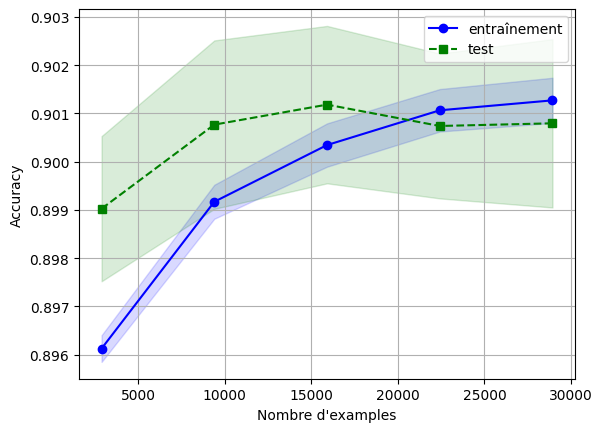

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(lr, X=X_train, y=y_train)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker = 'o', label="entraînement")
plt.fill_between(train_sizes,train_mean+train_std, train_mean-train_std,alpha=0.15, color="blue")

plt.plot(train_sizes, test_mean, color='green', marker = 's', linestyle='--', label="test")
plt.fill_between(train_sizes,test_mean+test_std, test_mean-test_std,alpha=0.15,color="green")

plt.grid()
plt.xlabel("Nombre d'examples")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.show()

on observe que l'accuracy du modèle en entraînement progresse graduellement à mesure que la taille de l'échantillon augmente. De son côté, l'accuracy en test suit globalement la même dynamique, avec une zone d'incertitude qui varie mais reste assez proche de la courbe d'entraînement. L'écart entre les deux lignes demeure donc modéré, ce qui suggère qu'avant optimisation, la régression logistique ne présente pas de surapprentissage majeur sur cet indicateur : au fur et à mesure qu'on ajoute des exemples, l'accuracy en test a tendance à se stabiliser au même niveau que celle en entraînement. Cela indique qu'à ce stade, le modèle se généralise plutôt correctement, bien qu'un léger gain supplémentaire puisse encore être obtenu avec plus de données ou peut-etre une meilleure calibration des hyperparamètres.

### 2 - **Arbre de décision**

In [63]:
# Construction du modèle d'arbre de décision
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Evaluation du Modèle
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Afficher le résultat des différente métrique et la matrice de confusion
print('Accuracy:', dtc_eval['acc']*100,"%")
print('Precision:', dtc_eval['prec']*100,"%")
print('Recall:', dtc_eval['rec']*100, "%")
print('F1 Score:', dtc_eval['f1']*100,"%")
print('Area Under Curve:', dtc_eval['auc']*100, "%")
print('Matrice de confusion::\n', dtc_eval['cm'])

Accuracy: 87.80272033617163 %
Precision: 47.9489516864175 %
Recall: 49.7164461247637 %
F1 Score: 48.816705336426914 %
Area Under Curve: 71.28276908617647 %
Matrice de confusion::
 [[7414  571]
 [ 532  526]]


> La valeur d'**AUC** à 70,98% indique une capacité de discrimination modérée entre les deux classes ; le modèle sait séparer globalement les “**Yes**” et les “**No**”.
Cependant, son **Recall** (48,53 %) reste relativement **faible**: près de la moitié des cas positifs ne sont pas identifiés, ce qui peut être problématique.
Bien que l'accuracy globale (88%) soit correcte, elle est surtout tirée par la majorité de la classe négative.

#### Représentation graphique de l'arbre :

> Nous utiliserons la fonction plot_tree() que nous avons importée. Nous lui transmettons notre modèle ainsi que quelques paramètres supplémentaires. Notez que si nous n'avions pas fixé max_depth=2, la fonction renverrait un dessin de l'arbre entier, jusqu'aux feuilles. Cela est impossible et inutile. Ce sont les divisions les plus proches de la racine qui nous intéressent le plus, car ce sont elles qui nous fournissent les caractéristiques les plus prédictives.
class_names affiche la classe majoritaire de chaque nœud, et filled colore les nœuds en fonction de leur classe majoritaire.

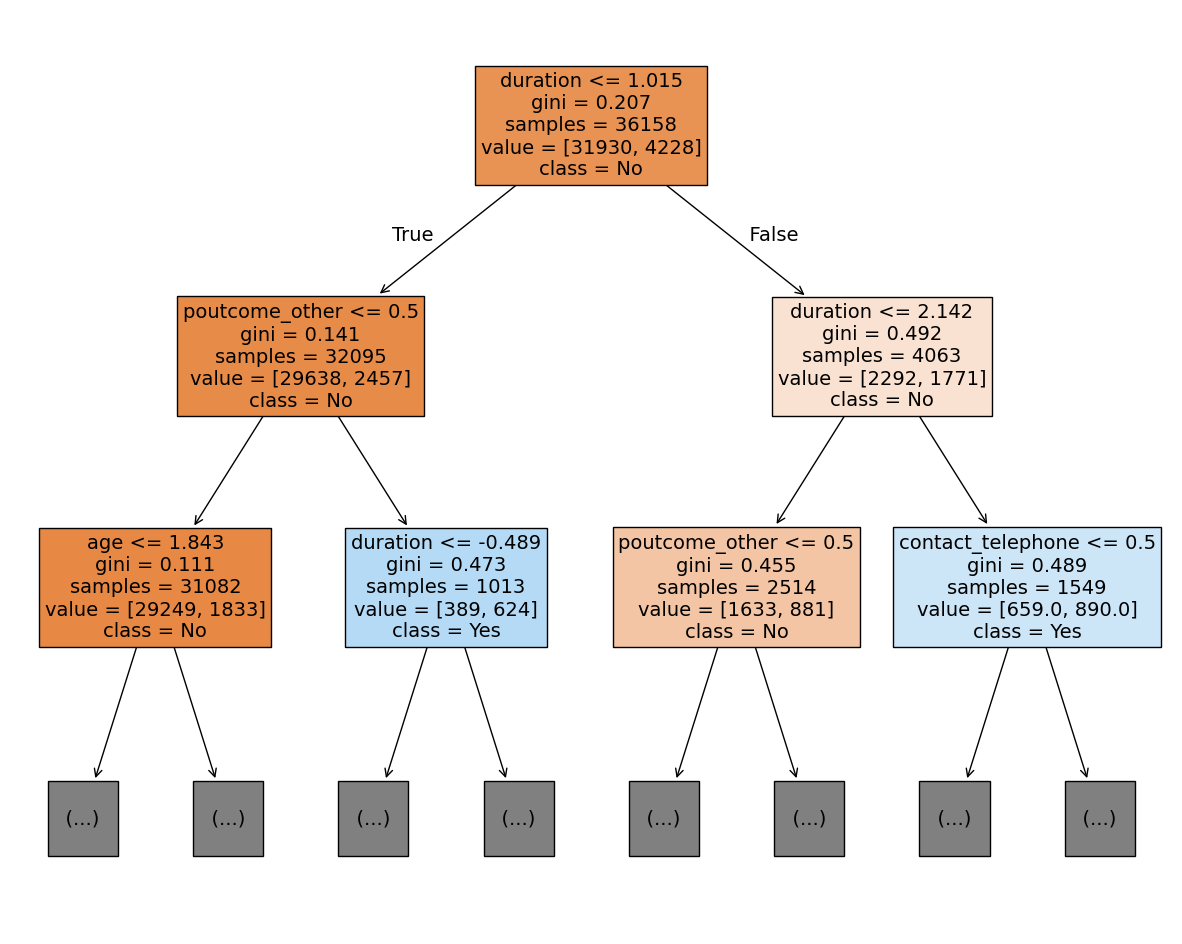

In [ ]:
plt.figure(figsize=(15,12))
plot_tree(dtc, max_depth=2, fontsize=14, feature_names=df.columns[:-1],
          class_names={0:'No', 1:'Yes'}, filled=True);
plt.show()

> Sur cet arbre, on voit d'emblée que la durée de l'appel (duration) est le premier critère de décision, ce qui suggère qu’un appel plus long favorise davantage la souscription « Yes ». À gauche, on retrouve ensuite la variable poutcome_other et l'age (age), tandis qu'à droite, la durée est à nouveau discriminante, puis interviennent poutcome_other et le mode de contact (contact_telephone).
Au global, cet arbre révèle que les durées d'appel, l'historique d'une précédente campagne (poutcome) et certaines caractéristiques démographiques (comme l'age) ou de contact (téléphone) sont des facteurs majeurs pour prévoir si le client va souscrire ou non.


#### Courbe d'apprentissage :

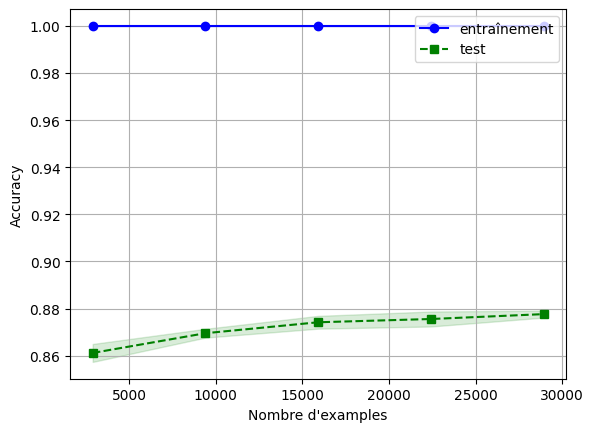

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(dtc, X=X_train, y=y_train)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker = 'o', label="entraînement")
plt.fill_between(train_sizes,train_mean+train_std, train_mean-train_std,alpha=0.15, color="blue")

plt.plot(train_sizes, test_mean, color='green', marker = 's', linestyle='--', label="test")
plt.fill_between(train_sizes,test_mean+test_std, test_mean-test_std,alpha=0.15,color="green")

plt.grid()
plt.xlabel("Nombre d'examples")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.show()

> On peut observer du sur-apprentissage pour notre algorithme d'arbre de décision avec les paramètre par défault : La courbe de l'accuracy en entraînement reste presque constante.Tandis, que la courbe de l'accuracy en test est nettement plus faible (environ 0.86-0.88) et ne rejoint pas celle d'entraînement.Ce genre d'écart suggère que le modèle mémorise ou s'adapte trop spécifiquement aux données d'entraînement, ce qui nuit à sa généralisation.   
Piste d'amélioration du modèle : ajuster les hyperparamètre du modèle nous aider à résoudre le probleme  de l'overfitting

### 3 - **NaiveBayes**

In [64]:
# Naive Bayes modèle
nb = GaussianNB()
nb.fit(X_train, y_train)

# Evaluation du Model
nb_eval = evaluate_model(nb, X_test, y_test)

# Print des resulats
print('Accuracy:', nb_eval['acc']*100,'%')
print('Precision:', nb_eval['prec']*100,'%')
print('Recall:', nb_eval['rec']*100,'%')
print('F1 Score:', nb_eval['f1']*100,'%')
print('Area Under Curve:', nb_eval['auc']*100,'%')
print('Matrice de confusion:\n', nb_eval['cm'])


Accuracy: 85.84540528585647 %
Precision: 41.71641791044776 %
Recall: 52.83553875236295 %
F1 Score: 46.622185154295245 %
Area Under Curve: 82.44955392495143 %
Matrice de confusion:
 [[7204  781]
 [ 499  559]]


Avec une accuracy de 85,56%, le modèle Naïve Bayes présente des résultats globalement corrects, mais les metrics spécifiques à la détection de la classe positive révèlent encore des axes d'amélioration. En effet, la précision (40,57%) indique qu'un peu moins de la moitié des prédictions positives sont exactes, et le Recall 50,52% montre qu'environ la moitié seulement des exemples positifs sont identifiés. Le score F1 s'élève ainsi à 46%, soulignant la difficulté du modèle à concilier les deux dimensions de précision et de recall.

En revanche, l'AUC = 81,27% signale une bonne capacité de séparation globale entre les classes. Pour optimiser la détection des cas positifs, diverses pistes peuvent être explorées,telque l'ajustement du paramètre de lissage var_smoothing. Ainsi, on pourrait améliorer la détection de la classe minoritaire.

#### Courbe d'apprentissage

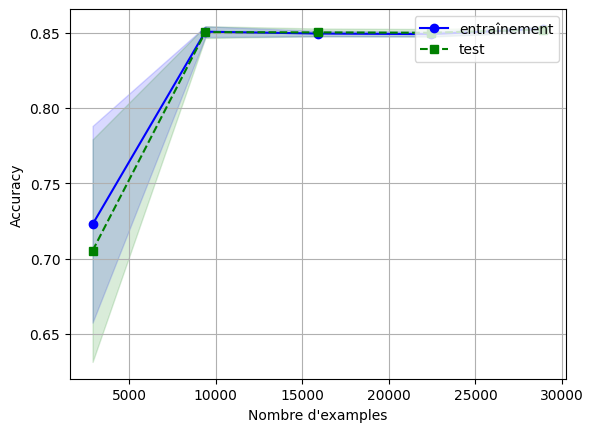

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(nb, X=X_train, y=y_train)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker = 'o', label="entraînement")
plt.fill_between(train_sizes,train_mean+train_std, train_mean-train_std,alpha=0.15, color="blue")

plt.plot(train_sizes, test_mean, color='green', marker = 's', linestyle='--', label="test")
plt.fill_between(train_sizes,test_mean+test_std, test_mean-test_std,alpha=0.15,color="green")

plt.grid()
plt.xlabel("Nombre d'examples")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.show()

On observe qu'avec un nombre restreint d'exemples, l'accuracy en entraînement est plus élevée que celle en test, mais également plus variable (large bande bleue). En augmentant la taille de l'échantillon, les deux courbes (entraînement et test) se rejoignent rapidement autour d'une accuracy avoisinant 85%, ce qui indique que le modèle généralise de façon satisfaisante. On constate aussi qu'au-delà d'un certain seuil (environ 10 000 échantillons), les performances se stabilisent, suggérant que l'ajout de données supplémentaires ne permet plus un gain important en accuracy pour l'algo Naïve Bayes.

### 4. **K-NN**

In [89]:
# KNN modèle
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Evaluation du Modèle
knn_eval = evaluate_model(knn, X_test, y_test)

# Affichage  des résulat
print('Accuracy:', knn_eval['acc']*100,'%')
print('Precision:', knn_eval['prec']*100,'%')
print('Recall:', knn_eval['rec']*100,'%')
print('F1 Score:', knn_eval['f1']*100,'%')
print('Area Under Curve:', knn_eval['auc']*100,'%')
print('Matrice de confusion:\n', knn_eval['cm'])

Accuracy: 89.74557522123894 %
Precision: 60.979729729729726 %
Recall: 34.15326395458846 %
F1 Score: 43.78411158277744 %
Area Under Curve: 82.48426676792252 %
Matrice de confusion:
 [[7752  231]
 [ 696  361]]


K-NN obtient ici une **Accuracy** d'environ **89,75%**,Le modèle classe correctement une majorité de cas, ce qui peut s'expliquer en partie par la dominance de la classe '**No**' dans le dataset. Une accuracy élevée ne signifie pas toujours qu'on identifie bien la classe positive.

cette statistique masque d'importantes lacunes pour la classe positive, comme en témoigne le **Recall** de seulement **34%**. Autrement dit, plus des deux tiers des cas positifs échappent à la détection.C'est le point faible ici.

La **précision** à près de **61%** indique par ailleurs que parmi les prédictions positives de K-NN, un nombre non négligeable se révèlent inexactes. En conséquence, le **F1-score**, qui résume la tension entre précision et recall, se situe autour de **44%**, reflétant la difficulté du modèle à concilier les deux.

On note malgré tout une **AUC** de **82,48%**, qui est globalement un bon score.

Concernant la matrice de confusion : on peut observer que Sur 7752 vrais négatifs, le modèle ne commet que 231 faux positifs.Cepandant, il ne détecte que 361 vrais positifs sur 1057 cas réellement positifs (361 + 696), mettant en évidence de nombreux faux négatifs 696.

Piste d'amélioration : On peut envisager de modifier le nombre de K afin d'amélioer les performance du modèle.

#### Courbe d'apprentissage

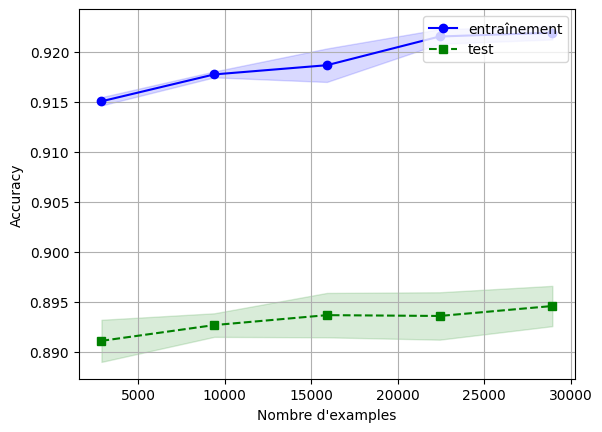

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(knn, X=X_train, y=y_train)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker = 'o', label="entraînement")
plt.fill_between(train_sizes,train_mean+train_std, train_mean-train_std,alpha=0.15, color="blue")

plt.plot(train_sizes, test_mean, color='green', marker = 's', linestyle='--', label="test")
plt.fill_between(train_sizes,test_mean+test_std, test_mean-test_std,alpha=0.15,color="green")

plt.grid()
plt.xlabel("Nombre d'examples")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.show()

Sur cette courbe d'apprentissage, on constate qu'au fur et à mesure que la taille de l'échantillon d'entraînement augmente, la performance du modèle sur l'ensemble d'entraînement se maintient à un niveau relativement élevé (autour de 0,92) et augmente légèrement, tandis que la performance en test (en vert) grimpe progressivement de 0,89 jusqu'à près de 0,895. Ce léger écart persistant entre les deux courbes suggère un sur-apprentissage: le modèle s'adapte particulièrement bien aux données d'entraînement, mais reste en deçà en test. Cependant, la hausse régulière de la courbe verte indique qu'avec plus d'exemples, l'accuracy de test s'améliore, reflétant une meilleure généralisation. Si cet écart diminue encore avec davantage de données ou un ajustement d'hyperparamètres, il est possible que la courbe de test se rapproche encore plus de celle d'entraînement, réduisant ainsi le sur-apprentissage.

### Comparaison des modèle

Maintenant que nos modèles sont développés, il est temps de comparer leurs performances. Pour cela, nous allons nous appuyer sur deux graphiques :

*	 Un diagramme à barres groupées qui présentera les valeurs d'accuracy, de précision, de Recall et de F1 pour chaque modèle.
*	 Un diagramme linéaire destiné à visualiser la courbe ROC de ces mêmes modèles.

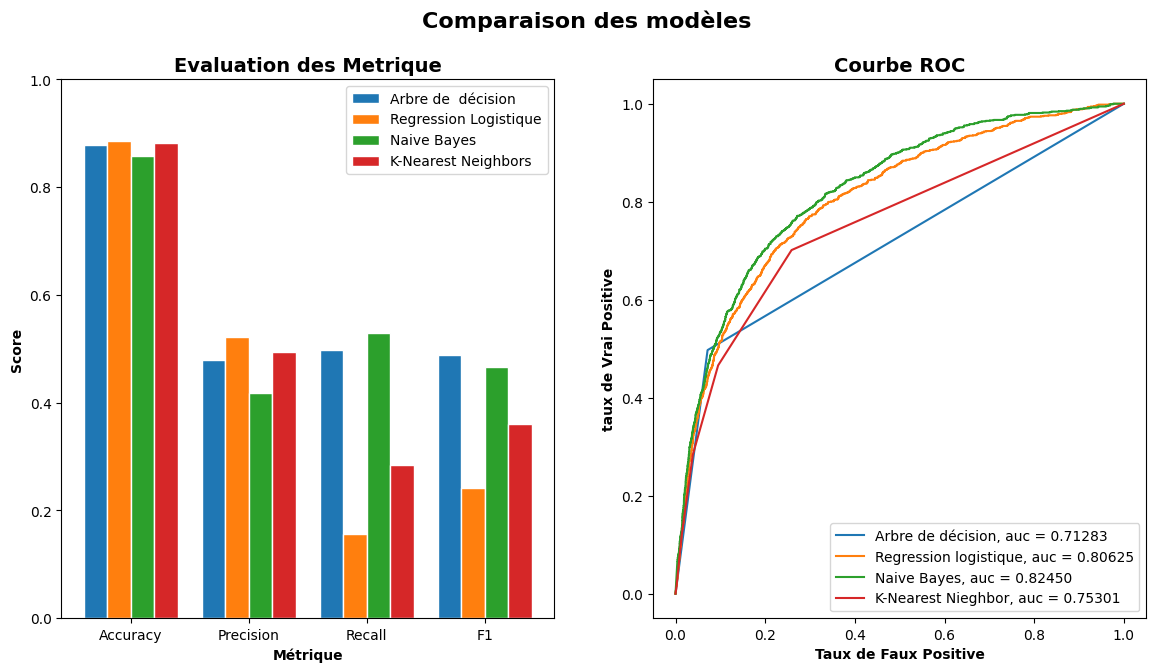

In [67]:
# Initialisation de la figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2)  # Création d'une figure avec deux sous-graphiques côte à côte
fig.suptitle('Comparaison des modèles', fontsize=16, fontweight='bold')
fig.set_figheight(7) # Définition de la hauteur de la figure
fig.set_figwidth(14) # Définition de la largeur de la figure
fig.set_facecolor('white')

# Premier graphique : comparaison des scores des modèles
## Définition de la largeur des barres pour l'histogramme
barWidth = 0.2

## Récupération des scores pour chaque modèle selon différentes métriques
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1']]
lr_score = [lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1']]

## Définition des positions des barres sur l'axe des abscisses
r1 = np.arange(len(dtc_score)) # Position de la première série de barres
r2 = [x + barWidth for x in r1] # Décalage pour la deuxième série de barres
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

## Création du graphique en barres
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Arbre de  décision')
ax1.bar(r2, lr_score, width=barWidth, edgecolor='white', label='Regression Logistique')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configuration des axes X et Y
ax1.set_xlabel('Métrique', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Ajout du titre et de la légende
ax1.set_title('Evaluation des Metrique', fontsize=14, fontweight='bold')
ax1.legend()

# Deuxième graphique : courbes ROC des modèles
## Tracé des courbes ROC pour chaque modèle
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Arbre de décision, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(lr_eval['fpr'], lr_eval['tpr'], label='Regression logistique, auc = {:0.5f}'.format(lr_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configuration des axes X et Y
ax2.set_xlabel('Taux de Faux Positive', fontweight='bold')
ax2.set_ylabel('taux de Vrai Positive', fontweight='bold')

## Ajout du titre et de la légende
ax2.set_title('Courbe ROC', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

# Affichage des graphiques
plt.show()

> Régression logistique :  Se démarque par la meilleure AUC 91% et par une accuracy parmi les plus élevées.   

> Arbre de décision : Atteint une accuracy honorable, mais reste en retrait sur l'AUC 71%.

> Naive Bayes : Montre une AUC correcte 81% et se situe souvent en milieu de tableau sur les autres métriques.

> K-NN : Affiche une accuracy souvent proche de celle de la régression logistique, mais un recall plus faible, ce qui tire son F1 vers le bas.

Globalement, la régression logistique semble offrir le meilleur compromis (précision, recall, F1 et AUC). L'arbre de décision, bien qu'assez précis, pêche en termes de capacité à séparer correctement les classes (AUC la plus basse). Naïve Bayes et K-NN occupent une position intermédiaire, chacun ayant ses atouts (AUC raisonnable, bonne accuracy) et ses limites (précision ou recall moins satisfaisant)

## 5 - Optimisation des hyperparamètre - Validation croisé

Dans cette section, nous cherchons à ajuster les hyperparamètres et à réévaluer nos modèles pour ensuite les comparer à nouveau. Afin d'identifier la meilleure configuration de paramètres, nous allons utiliser GridSearchCV avec un critère de performance “roc_auc”.   

La fonction teste chacune des combinaisons de paramètres possibles et applique aussi la validation croisée : à chaque itération, les données sont scindées en 5 sous-ensembles (ce nombre se règle dans les paramètres), et le modèle est entraîné sur 4 sous-ensembles, tandis que le dernier sert à la validation. Cette procédure se répète jusqu'à ce que chaque partie des données ait été utilisée en tant que jeu de validation, ce qui permet de retenir la configuration offrant la meilleure moyenne de performance.

### **Arbre de Décision**

In [ ]:
# Création de la grille de recherche des hyperparamètres basée sur les résultats d'une recherche aléatoire
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 10],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
}

# Création d'un modèle de base
rf_grids = DecisionTreeClassifier(random_state=42)  # Initialisation du classificateur avec une graine aléatoire fixe

# Initialisation de la recherche par grille (GridSearchCV)
grid_search = GridSearchCV(estimator=rf_grids,# Modèle à optimiser
                           param_grid=param_grid, # Grille d'hyperparamètres définie précédemment
                           scoring='roc_auc', # Métrique d'évaluation : Aire sous la courbe ROC (AUC)
                           cv=5, # Validation croisée à 5 folds (permet d'améliorer la généralisation du modèle)
                           n_jobs=-1, # Utilisation de tous les cœurs disponibles pour accélérer le calcul
                           verbose=2) # Niveau de détail dans l'affichage des logs (permet de suivre la progression)

# Entraînement de la recherche par grille sur l'ensemble d'entraînement
grid_search.fit(X_train, y_train)

# Affichage des meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres : ", grid_search.best_params_)

Fitting 5 folds for each of 63 candidates, totalling 315 fits
Meilleurs hyperparamètres :  {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [34]:
# Arbre de décision modèle
dtc = DecisionTreeClassifier(max_depth= 7, min_samples_leaf= 4, min_samples_split= 2,random_state=42)
dtc.fit(X_train, y_train)

# Evaluation du Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print des résultats
print('Accuracy:', dtc_eval['acc']*100,"%")
print('Precision:', dtc_eval['prec']*100,"%")
print('Recall:', dtc_eval['rec']*100, "%")
print('F1 Score:', dtc_eval['f1']*100,"%")
print('Area Under Curve:', dtc_eval['auc']*100, "%")
print('Matrice de confusion::\n', dtc_eval['cm'])

Accuracy: 90.07743362831859 %
Precision: 61.66180758017493 %
Recall: 40.01892147587512 %
F1 Score: 48.53700516351119 %
Area Under Curve: 86.87961682055919 %
Matrice de confusion::
 [[7720  263]
 [ 634  423]]


> Les résultats montrent une bonne **accuracy** (90%), mais on constate que le **recall** (40%) reste assez faible : le modèle ne détecte qu'environ 40% des exemples positifs réels. Cela suggère qu'il rate encore de nombreux cas (faux négatifs). La **précision**, elle, se situe autour de 62 %, indiquant qu'au sein des prédictions positives, 62% sont correctes. L'**AUC** (86,9%) témoigne d'une bonne capacité de discrimination dans l'ensemble, mais le **F1-score** (48,5%) montre bien la difficulté qu'a le modèle à concilier précision et recall.l'arbre de décision réussit à classer correctement la majorité des clients, mais la détection des cas positifs reste assez faible

Courbe d'apprentissage

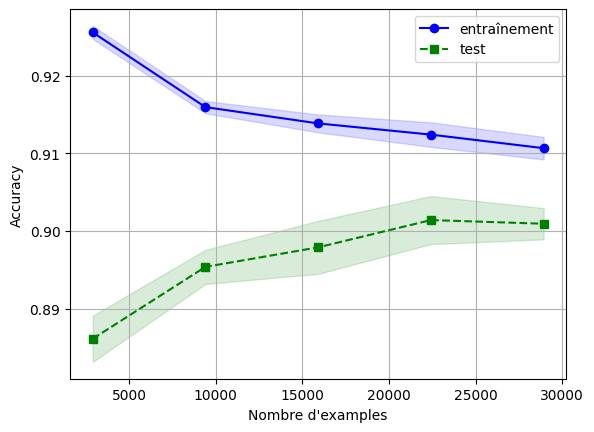

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(dtc, X=X_train, y=y_train)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker = 'o', label="entraînement")
plt.fill_between(train_sizes,train_mean+train_std, train_mean-train_std,alpha=0.15, color="blue")

plt.plot(train_sizes, test_mean, color='green', marker = 's', linestyle='--', label="test")
plt.fill_between(train_sizes,test_mean+test_std, test_mean-test_std,alpha=0.15,color="green")

plt.grid()
plt.xlabel("Nombre d'examples")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.show()

l'accuracy en entraînement est très élevée au-dessus de 92%, signe que le modèle s'adapte fortement aux données dont il dispose, tandis que la performance en test reste plus basse autour de 89% (overfitting). Au fur et à mesure que le nombre d'échantillons augmente, la précision en entraînement diminue, tandis que la précision en test s'améliore légèrement, dépassant 0,90 pour les plus grands ensembles.

Ce rapprochement des deux courbes traduit un effet de réduction de surapprentissage, lorsque le modèle voit plus de données variées, il généralise mieux.Le fait qu'il n'y une réduction de l'écart avec plus de données laisse présager que le modèle a des performances acceptables.


### Regression logistique

In [68]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear'],
    'penalty': ['l2']
}

rf_grids = LogisticRegression(random_state=42,max_iter=1000)

grid_search = GridSearchCV(
    estimator=rf_grids,
    param_grid=param_grid_lr,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2)

grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

Construction et evaluation du modèle optimisé

In [35]:
# construction du model de régression logistique
lr = LogisticRegression(C=0.1, penalty= 'l2', solver= 'liblinear',max_iter=1000,random_state=42)
lr.fit(X_train, y_train)

#Évaluation avec un seuil de décision personnalisé (0,3)
threshold = 0.3

y_pred_proba = lr.predict_proba(X_test)[:, 1]  # Probabilité d'appartenir à la classe positive

# Conversion en prédictions binaires selon 'threshold'
y_pred_custom = (y_pred_proba >= threshold).astype(int)

# Calcul des métriques avec ce seuil personnalisé
lr_acc = metrics.accuracy_score(y_test, y_pred_custom)
lr_prec = metrics.precision_score(y_test, y_pred_custom)
lr_rec = metrics.recall_score(y_test, y_pred_custom)
lr_f1 = metrics.f1_score(y_test, y_pred_custom)

# Calcul de l'AUC
lr_fpr, lr_tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
lr_auc= metrics.roc_auc_score(y_test, y_pred_proba)

# Matrice de confusion
lr_cm = metrics.confusion_matrix(y_test, y_pred_custom)

print('Accuracy:', lr_acc)
print('Precision:', lr_prec)
print('Recall:', lr_rec)
print('F1 Score:', lr_f1)
print('Area Under Curve:', lr_auc)
print('Matrice de confusion:\n', lr_cm)



Accuracy: 0.9051991150442478
Precision: 0.6048218029350105
Recall: 0.5458845789971618
F1 Score: 0.5738438587767279
Area Under Curve: 0.9071842708328518
Matrice de confusion:
 [[7606  377]
 [ 480  577]]


Avec ce seuil personnalisé de 0,3 et les hyperparamètres ajustés, on constate que l'accuracy reste proche de 90,5% contre 90,54% avant, mais le Recall augmente nettement environ 54,6% contre 36,4%, ce qui signifie que le modèle détecte bien plus de positifs qu'avec le seuil de 0,5. En contrepartie, la précision passe de 67,8 % à 60,5%, puisqu'une partie des prédictions positives supplémentaires sont des faux positifs. Au final, le F1-score gagne 10% (de 47,4% à 57,4%), montrant une meilleure conciliation entre précision et Recall. L'AUC demeure aux environs de 90,7%, confirmant que la capacité globale de séparation reste élevée.

En bref, abaisser le seuil et optimiser les paramètres ont permis de mieux identifier les cas positifs (hausse du Recall) tout en maintenant une précision et une exactitude globales satisfaisantes, ce qui aboutit à un meilleur compromis entre détection et exactitude sur la classe minoritaire.

Courbe d'appretissage - Optimisé

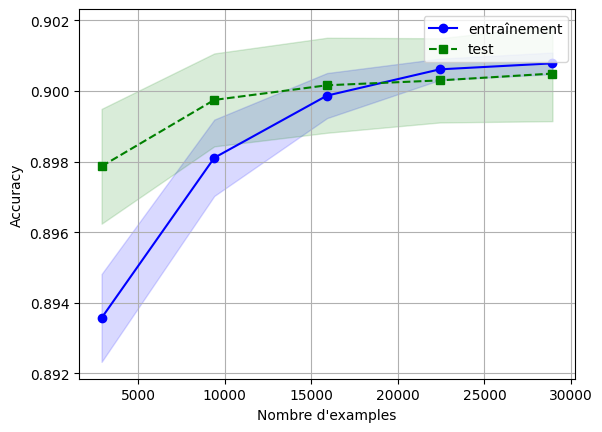

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(lr, X=X_train, y=y_train)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker = 'o', label="entraînement")
plt.fill_between(train_sizes,train_mean+train_std, train_mean-train_std,alpha=0.15, color="blue")

plt.plot(train_sizes, test_mean, color='green', marker = 's', linestyle='--', label="test")
plt.fill_between(train_sizes,test_mean+test_std, test_mean-test_std,alpha=0.15,color="green")

plt.grid()
plt.xlabel("Nombre d'examples")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.show()

Après l'ajustement du seuil et des hyperparamètres, la courbe d'apprentissage montre que l'accuracy du modèle en entraînement et celle en test convergent autour de 90%. On observe un gain progressif dans la performance à mesure que la taille de l'échantillon augmente : le modèle généralise mieux qu'auparavant, et l'écart entre les deux courbes demeure relativement restreint. Cette convergence relativement précoce suggère qu'au-delà de 15 000-20 000 exemples, l'ajout de données n'apporte plus un gain majeur. Le modèle semble donc mieux équilibrer sa capacité d'apprentissage, tout en restant globalement stable et sans chute notable de l'accuracy en test.

### Naive Bayes

In [ ]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}


rf_grids = GaussianNB()


grid_search = GridSearchCV(estimator=rf_grids, param_grid=param_grid, scoring='roc_auc',
                           cv=5, n_jobs=-1, verbose=2)


grid_search.fit(X_train, y_train)

print("Meilleurs hyperparamètres : ", grid_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Meilleurs hyperparamètres :  {'var_smoothing': 1e-05}


 Re-Evaluation des modèles optimisé

In [36]:
nb = GaussianNB(var_smoothing = 1e-05)
nb.fit(X_train, y_train)


nb_eval = evaluate_model(nb, X_test, y_test)


print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Area Under Curve:', nb_eval['auc'])
print('Matrice de confusion::\n', nb_eval['cm'])

Accuracy: 0.855641592920354
Precision: 0.40577507598784196
Recall: 0.5052034058656575
F1 Score: 0.450063211125158
Area Under Curve: 0.8127544802810039
Matrice de confusion::
 [[7201  782]
 [ 523  534]]


Avec un var_smoothing=1e-05, Naïve Bayes obtient une accuracy d'environ 85,56 %, mais sa précision 40,58 % reste assez faible, indiquant qu'à peine 4 prédictions positives sur 10 sont correctes. Le recall (50,52 %) traduit une capture modérée des cas positifs, et le score F1 (45 %) reflète ce compromis encore imparfait entre précision et recall. L'AUC (81,28 %) démontre malgré tout une capacité de discrimination correcte dans l'ensemble.

En pratique, on constate donc que l'ajustement du var_smoothing n'a pas radicalement transformé la performance de Naïve Bayes : si le modèle identifie correctement la majorité des négatifs (d'où l'ccuracy élevée), il a plus de difficulté à reconnaître et prédire fidèlement les positifs.

Courbe d'apprenstissage

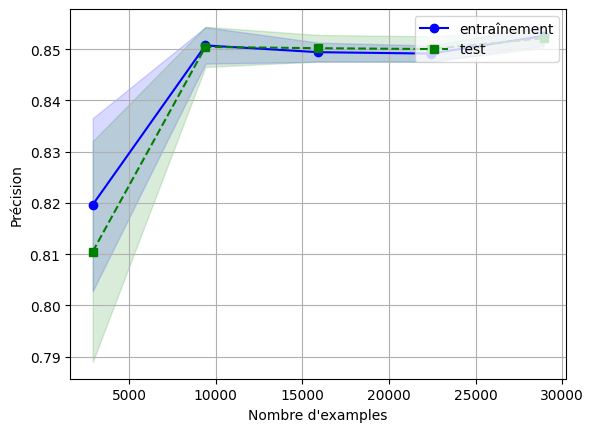

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(nb, X=X_train, y=y_train)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker = 'o', label="entraînement")
plt.fill_between(train_sizes,train_mean+train_std, train_mean-train_std,alpha=0.15, color="blue")

plt.plot(train_sizes, test_mean, color='green', marker = 's', linestyle='--', label="test")
plt.fill_between(train_sizes,test_mean+test_std, test_mean-test_std,alpha=0.15,color="green")

plt.grid()
plt.xlabel("Nombre d'examples")
plt.ylabel("accuracy")
plt.legend(loc='upper right')
plt.show()

Au départ, lorsque l'échantillon est encore réduit (aux alentours de 3 000 à 8 000 exemples), la précision en entraînement grimpe rapidement (de ~0,82 à ~0,85), tandis que la courbe de test est un peu plus basse et présente une plus forte variabilité (bande verte plus large). Au fil de l'augmentation du nombre d'exemples, les deux courbes se rapprochent et finissent par stagner autour de 0,84-0,85, avec un écart faible. Cette convergence indique que le modèle généralise correctement : il ne souffre ni d'un surapprentissage excessif pas de différence marquée entre les courbes, ni d'un sous-apprentissage les performances sont plutôt élevées. Après environ 10 000 exemples, l'ajout de données semble n'apporter qu'un léger bénéfice, suggérant qu'on a atteint un plateau dans l'amélioration de la précision.

### K-NN

In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan']
}


rf_grids = KNeighborsClassifier()


grid_search = GridSearchCV(
    estimator=rf_grids,
    param_grid=param_grid_knn,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2)


grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


{'metric': 'euclidean', 'n_neighbors': 9}

Evaluation du modèle avec les paramètre optimisé

In [37]:
knn = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 9)
knn.fit(X_train, y_train)


knn_eval = evaluate_model(knn, X_test, y_test)


print('Accuracy:', knn_eval['acc']*100,'%')
print('Precision:', knn_eval['prec']*100,'%')
print('Recall:', knn_eval['rec']*100,'%')
print('F1 Score:', knn_eval['f1']*100,'%')
print('Area Under Curve:', knn_eval['auc']*100,'%')
print('Matrice de confusion::\n', knn_eval['cm'])

Accuracy: 90.06637168141593 %
Precision: 64.97175141242938 %
Recall: 32.63954588457899 %
F1 Score: 43.45088161209068 %
Area Under Curve: 85.83901860516985 %
Matrice de confusion::
 [[7797  186]
 [ 712  345]]


Avec 9 voisins et une distance euclidienne, le modèle K-NN atteint 90% d'accuracy, mais son Recall demeure très faible (32,64 %), ce qui signifie qu'il ne détecte qu'environ un tiers des cas positifs. Bien que la précision (près de 65 %) reste correcte, le F1-score (43,45 %) souffre de ce Recall limité, et montre que le modèle sous-qualifie la classe minoritaire. L'AUC (85,84 %) laisse entendre que, si l'on ajustait le seuil de décision, on pourrait éventuellement améliorer la détection des positifs, mais il faudrait accepter plus de faux positifs.

En somme, même après ce réglage d'hyperparamètres (K=9, distance euclidienne), K-NN classifie bien la majorité négative, mais rate beaucoup de positifs. On pourrait envisager un rééquilibrage (oversampling ou SMOTE), un changement de seuil,pour élever la précision et le Recall sur la classe sous-représentée.

Courbe d'apprentissage avec les paramètre optimisé

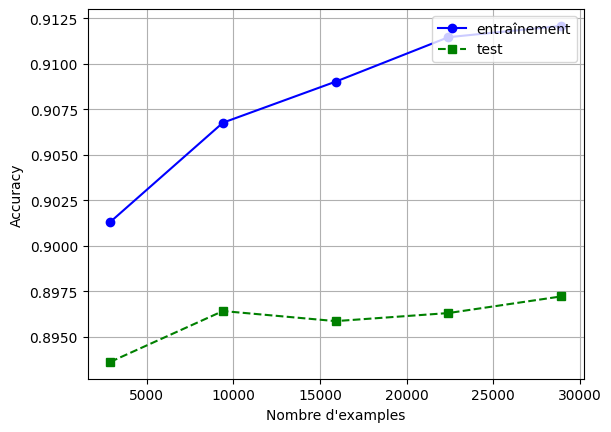

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(knn, X=X_train, y=y_train)
train_mean = np.mean(train_scores, axis=1)
#train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
#test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker = 'o', label="entraînement")
#plt.fill_between(train_sizes,train_mean+train_std, train_mean-train_std,alpha=0.15, color="blue")

plt.plot(train_sizes, test_mean, color='green', marker = 's', linestyle='--', label="test")
#plt.fill_between(train_sizes,test_mean+test_std, test_mean-test_std,alpha=0.15,color="green")

plt.grid()
plt.xlabel("Nombre d'examples")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.show()

Sur cette courbe, on constate que l'accuracy en entraînement part d'environ 0,90 et augmente jusqu'à près de 0,91–0,912 au fur et à mesure qu'on ajoute des exemples. De son côté, l'accuracy en test évolue dans une plage un peu plus basse (~0,895 à 0,90) avec une tendance générale à la légère hausse. L'écart entre les deux courbes demeure relativement constant, autour de 1 à 1,5 point de pourcentage, révélant un surapprentissage : le modèle s'adapte un peu mieux aux données d'entraînement qu'à celles de test.

Malgré tout, on observe que la performance en test ne semble plus gagner significativement après 10 000 exemples, ce qui suggère qu'augmenter encore la taille du jeu de données n'apporterait pas forcément un gain majeur en accuracy.

### Comparaison des modèle optimisé

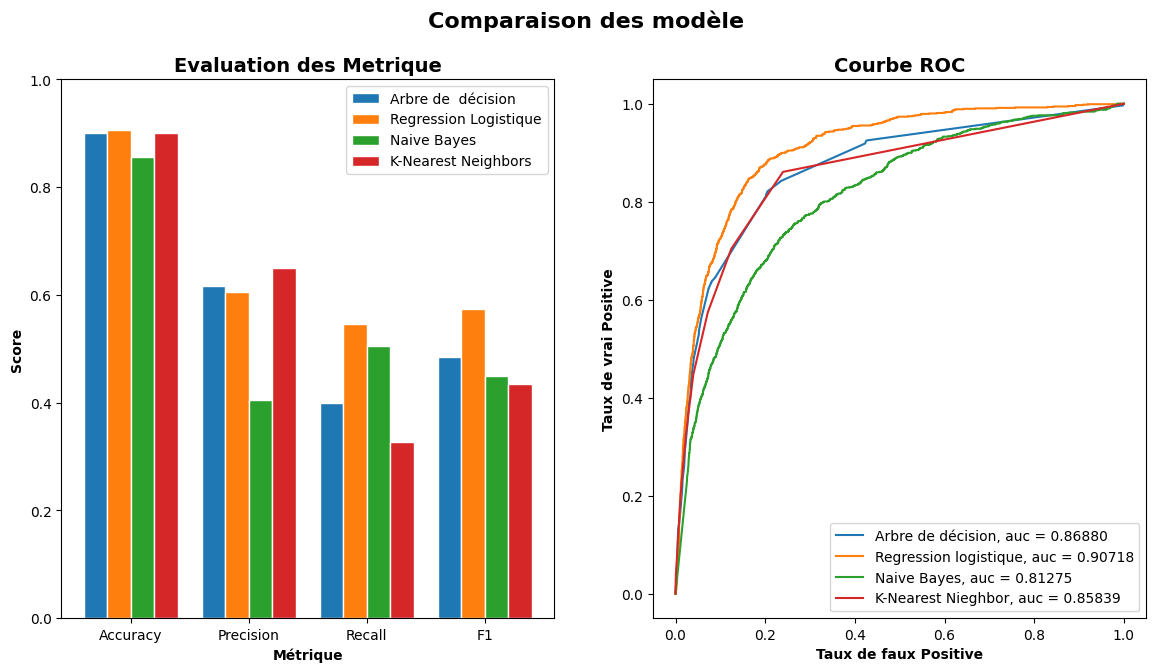

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Comparaison des modèle', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')


barWidth = 0.2
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1']]
lr_score = [lr_acc, lr_prec, lr_rec, lr_f1]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1']]


r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]


ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Arbre de  décision')
ax1.bar(r2, lr_score, width=barWidth, edgecolor='white', label='Regression Logistique')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')


ax1.set_xlabel('Métrique', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)


ax1.set_title('Evaluation des Metrique', fontsize=14, fontweight='bold')
ax1.legend()



ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Arbre de décision, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(lr_fpr, lr_tpr, label='Regression logistique, auc = {:0.5f}'.format(lr_auc))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))


ax2.set_xlabel('Taux de faux Positive', fontweight='bold')
ax2.set_ylabel('Taux de vrai Positive', fontweight='bold')


ax2.set_title('Courbe ROC', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

Après l'optimisation via GridSearchCV, on constate que l'Arbre de Décision a nettement amélioré son AUC 87%, se rapprochant ainsi de la Régression Logistique dont l'AUC reste la plus élevée 91%. Le K-NN gagne également en discrimination 86%, tandis que Naïve Bayes, à 81%, maintient une performance plus modeste.

En ce qui concerne l'accuracy et la précision, K-NN se distingue cette fois-ci en affichant la précision la plus élevée, surpassant même la régression logistique. Toutefois, son faible recall pénalise son F1-score. À l'inverse, la régression logistique maintient un bon équilibre entre recall et précision, confirmant sa robustesse globale et justifiant son AUC dominante. L'arbre de décision obtient désormais une meilleure capacité de séparation qu'avant (AUC en hausse) et un F1 correct, tandis que Naïve Bayes conserve un recall satisfaisant mais demeure pénalisé par une précision plus basse, d'où un F1-score en retrait.

En définitive, la régression logistique conserve le meilleur compromis général, suivie de K-NN et de l'arbre de décision, chacun offrant des avantages spécifiques (excellente précision pour K-NN, robustesse en F1 pour l'arbre). Naïve Bayes profite moins du tuning.

## 6 - Conclusion

Au fil de ce projet, nous avons expérimenté plusieurs modèles de classification - Arbre de Décision, Régression Logistique, Naïve Bayes et K-NN - afin de prédire si un client souscrira à un dépôt à terme pour la banque portugaise. Après avoir procédé à un prétraitement des données, nous avons affiné chacun des modèles via un tuning d'hyperparamètres (GridSearchCV, ajustement du seuil,...etc) afin de renforcer la performance de chaque modèle.

Les résultats finaux montrent que :

> La **Régression Logistique** offre en général le meilleur compromis entre précision, recall et AUC, ce qui en fait une solution robuste.

> Le **K-NN**, bien qu'il affiche la précision la plus élevée, souffre d'un recall plus faible, indiquant qu'il néglige plusieurs cas positifs.

>	**L'Arbre de Décision**, initialement moins performant, a fortement gagné en AUC grâce au tuning, se rapprochant de la performance de la logistique.

> Le **Naïve Bayes**, malgré une bonne base théorique et un certain équilibre entre recall et précision, reste en retrait du point de vue de la précision, ce qui se répercute sur son F1-score.

Toutefois, bien que certains modèles atteignent des scores honorables, ils affichent encore des faiblesses, notamment un recall limité (environ 55 %). Cela signifie qu'ils ne détectent qu'une partie des clients susceptibles de souscrire, en laissant échapper 45 % de la classe positive. De plus, même après l'optimisation des hyperparamètres, l'amélioration reste marginale, suggérant que nous atteignons les limites de ces algorithmes sur ce dataset. Pour progresser, une possibiliré serait de tester le rééquilibrage des classes (SMOT ou Oversampling..etc).

